In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("combined.csv")
df.head()

,latitude,longitude,block_no,street_name_x,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name_y,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years
0,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2015-01,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,04 TO 06,74.0,Improved,1979,388000.0,63,54
1,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2016-03,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,07 TO 09,68.0,Improved,1979,350000.0,62,54
2,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2017-04,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,07 TO 09,68.0,Improved,1979,340000.0,61 years 05 months,54
3,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2017-05,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,07 TO 09,68.0,Improved,1979,322000.0,61 years 05 months,54
4,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2017-06,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,07 TO 09,68.0,Improved,1979,370000.0,61 years 03 months,54


In [3]:
df.shape

(223955, 20)

In [4]:
df.isna().sum()

latitude               0
longitude              0
block_no               0
street_name_x          0
postal_code            0
address                0
cbd_dist               0
min_dist_mrt           0
month                  0
town                   0
flat_type              0
block                  0
street_name_y          0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
lease_remain_years     0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [5]:
df["storey_range"][0]
storey = np.median([float(i) for i in df["storey_range"][0].split(' TO ')])
storey


np.float64(5.0)

In [6]:
df["storey_median"] = df["storey_range"].apply(lambda i:np.median([float(j) for j in i.split(' TO ')]))

In [7]:
df["flat_type"].value_counts()

flat_type
4 ROOM              93992
5 ROOM              55045
3 ROOM              54339
EXECUTIVE           16675
2 ROOM               3738
MULTI-GENERATION       84
1 ROOM                 82
Name: count, dtype: int64

In [8]:
df["flat_model"].nunique()

21

In [9]:
df["flat_model"].value_counts()

flat_model
Model A                   76485
Improved                  55387
New Generation            29506
Premium Apartment         24578
Simplified                 9056
Apartment                  8363
Maisonette                 6323
Standard                   6266
DBSS                       3296
Model A2                   2722
Type S1                     443
Model A-Maisonette          403
Adjoined flat               379
Type S2                     219
Terrace                     124
2-room                      122
Premium Apartment Loft      113
Multi Generation             84
3Gen                         39
Improved-Maisonette          31
Premium Maisonette           16
Name: count, dtype: int64

In [10]:
scope_df = df[['cbd_dist','min_dist_mrt','flat_type','flat_model','floor_area_sqm','lease_remain_years','storey_median','resale_price']]
scope_df

,cbd_dist,min_dist_mrt,flat_type,flat_model,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,2715.822202,457.092359,3 ROOM,Improved,74.0,54,5.0,388000.0
1,2715.822202,457.092359,3 ROOM,Improved,68.0,54,8.0,350000.0
2,2715.822202,457.092359,3 ROOM,Improved,68.0,54,8.0,340000.0
3,2715.822202,457.092359,3 ROOM,Improved,68.0,54,8.0,322000.0
4,2715.822202,457.092359,3 ROOM,Improved,68.0,54,8.0,370000.0
...,...,...,...,...,...,...,...,...
223950,2525.251132,182.864524,5 ROOM,Improved,112.0,91,23.0,1325000.0
223951,2525.251132,182.864524,5 ROOM,Improved,112.0,91,20.0,1400000.0
223952,2525.251132,182.864524,4 ROOM,Model A,92.0,91,26.0,1188000.0
223953,2525.251132,182.864524,5 ROOM,Improved,112.0,91,35.0,1588000.0


In [11]:
scope_df.duplicated().sum()

np.int64(6455)

In [12]:
scope_df = scope_df.drop_duplicates()

In [17]:
scope_df.duplicated().sum()

np.int64(0)

In [13]:
scope_df.shape

(217500, 8)

In [14]:
scope_df.columns

Index(['cbd_dist', 'min_dist_mrt', 'flat_type', 'flat_model', 'floor_area_sqm',
       'lease_remain_years', 'storey_median', 'resale_price'],
      dtype='object')

In [15]:
df1 = scope_df.copy()

cbd_dist : -0.5327332649683651


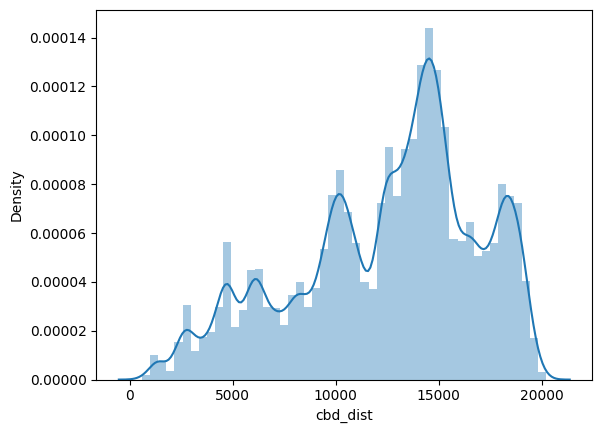

min_dist_mrt : 1.0521378529603636


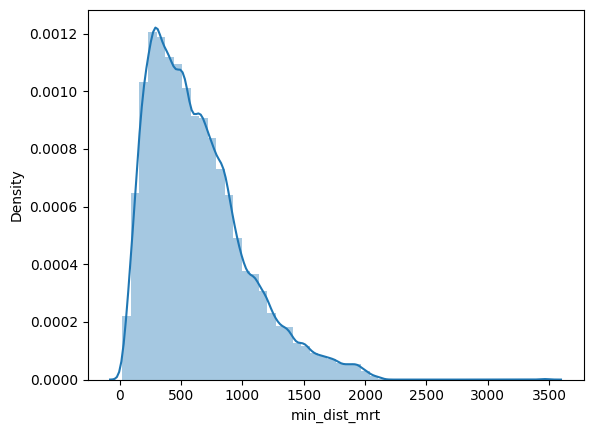

floor_area_sqm : 0.26643260778543665


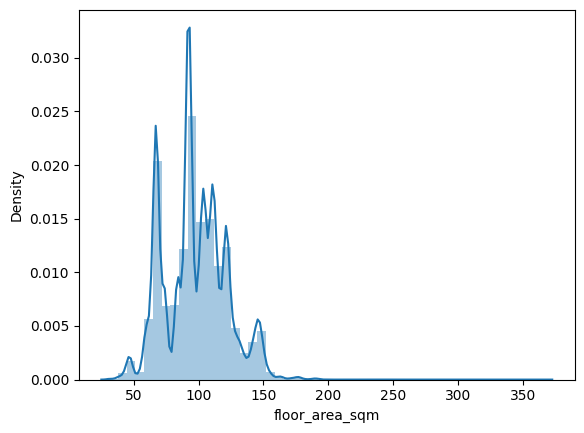

lease_remain_years : 0.13079894524590735


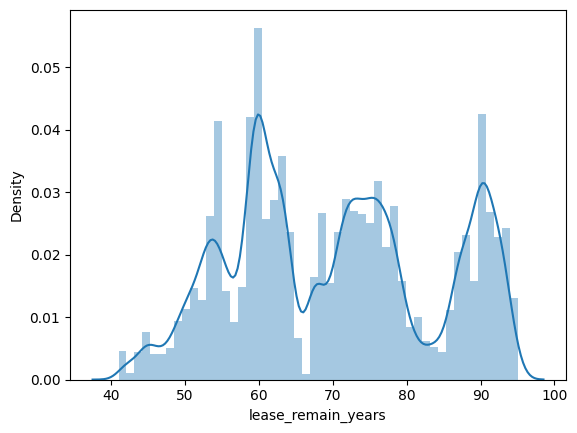

storey_median : 1.615441079362014


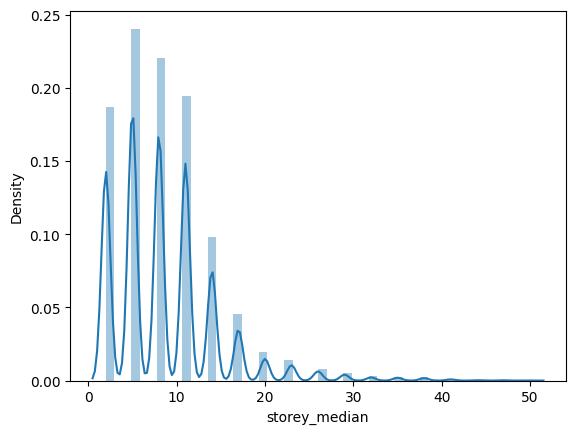

resale_price : 1.0079302290491257


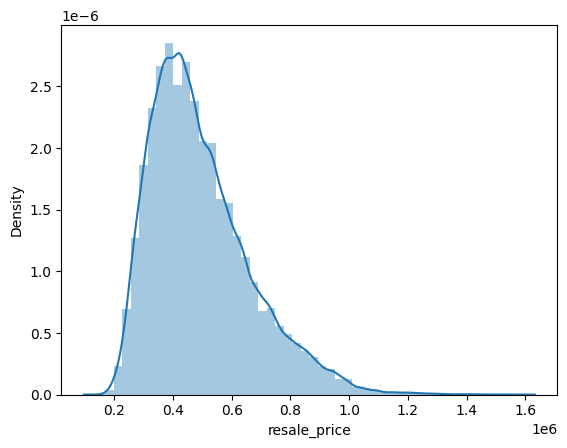

In [16]:
x = ['cbd_dist', 'min_dist_mrt','floor_area_sqm','lease_remain_years', 'storey_median', 'resale_price']
for i in x:
    print(i,":",df1[i].skew())
    sns.distplot(df1[i])
    plt.show()
    

In [17]:
x = ['cbd_dist', 'min_dist_mrt','floor_area_sqm','lease_remain_years', 'storey_median', 'resale_price']
for i in x:
    print(i,":",df1[i].skew())

cbd_dist : -0.5327332649683651
min_dist_mrt : 1.0521378529603636
floor_area_sqm : 0.26643260778543665
lease_remain_years : 0.13079894524590735
storey_median : 1.615441079362014
resale_price : 1.0079302290491257


In [18]:
x = ['cbd_dist', 'min_dist_mrt','floor_area_sqm','lease_remain_years', 'storey_median', 'resale_price']
for i in x:
    print(i,":",np.mean(df1[i]),np.median(df1[i]))

cbd_dist : 12453.556283825763 13369.687072730962
min_dist_mrt : 632.3571928315183 554.344964886835
floor_area_sqm : 97.37378436781609 94.0
lease_remain_years : 70.27214252873563 70.0
storey_median : 8.670041379310344 8.0
resale_price : 492958.01277521846 460000.0


In [19]:
df1['min_dist_mrt'] = df1['min_dist_mrt'].apply(lambda x:x if x>0 else np.nan)

In [20]:
df1.isna().sum()

cbd_dist              0
min_dist_mrt          0
flat_type             0
flat_model            0
floor_area_sqm        0
lease_remain_years    0
storey_median         0
resale_price          0
dtype: int64

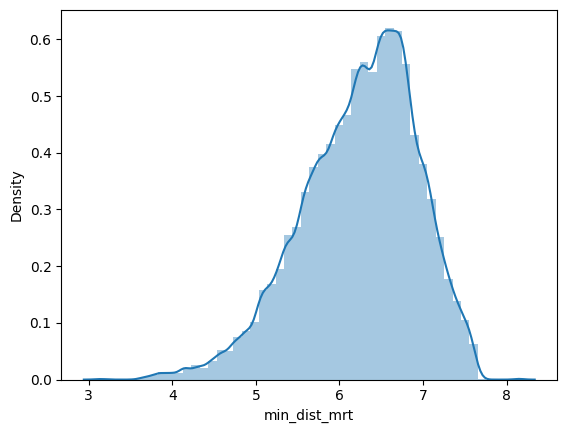

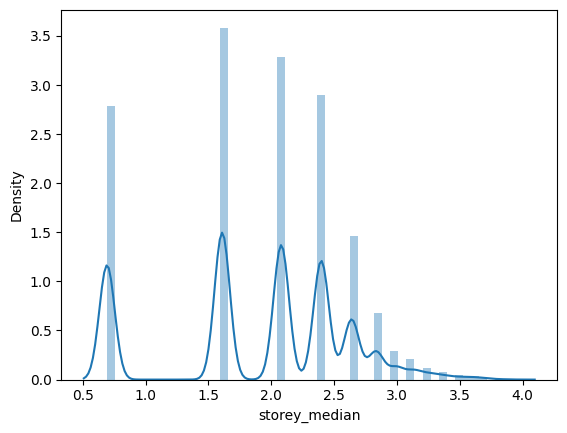

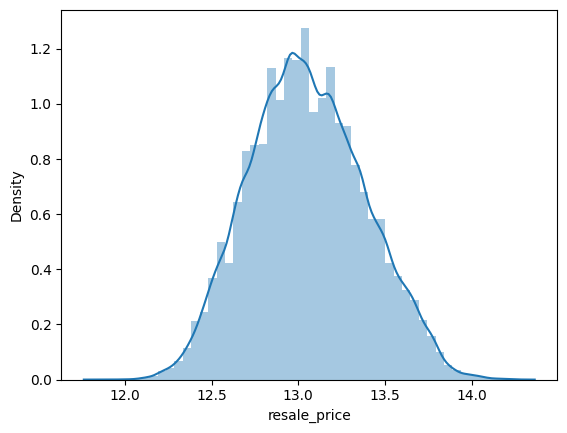

In [21]:
# cbd_dist,leasereamain years and floor_area_sqm have mild skewness so transformation may not be necessary for these three columns. All other colums are 
# positively skewed so log transformation can be applied.

y = ['min_dist_mrt', 'storey_median', 'resale_price']
for i in y:
    df1[i] = np.log(df1[i])
    sns.distplot(df1[i])
    plt.show()

In [22]:
y = ['min_dist_mrt', 'storey_median', 'resale_price']
for i in y:
    print(i,":",scope_df[i].skew(),"After Log Transformation:",df1[i].skew())
    

min_dist_mrt : 1.0521378529603636 After Log Transformation: -0.5637087104289873
storey_median : 1.615441079362014 After Log Transformation: -0.3706730616613993
resale_price : 1.0079302290491257 After Log Transformation: 0.144280930533877


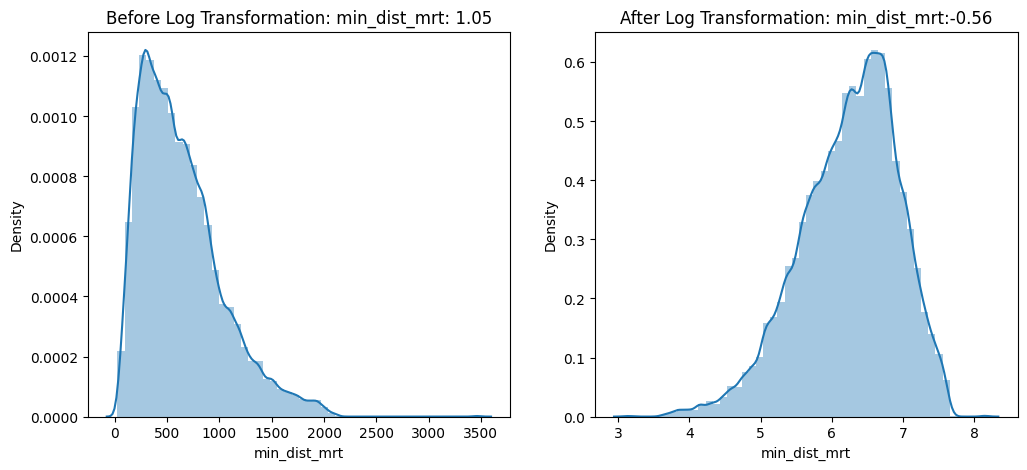

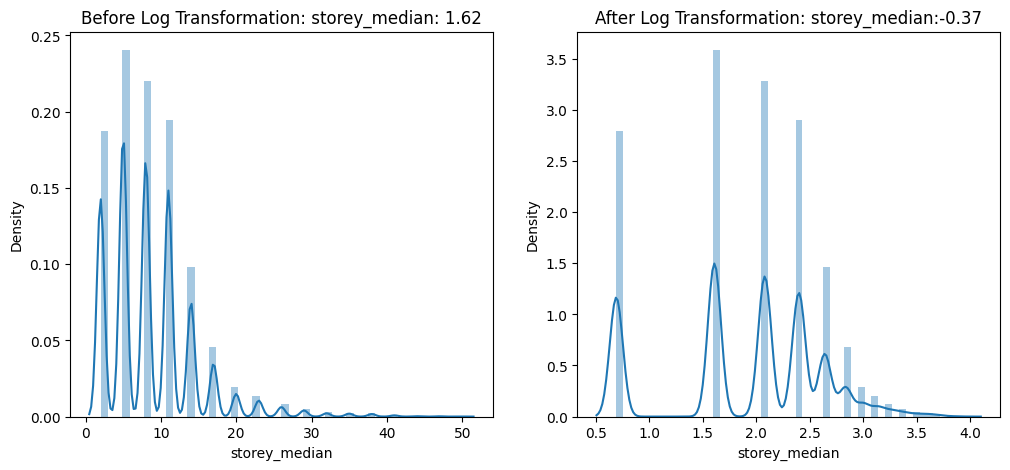

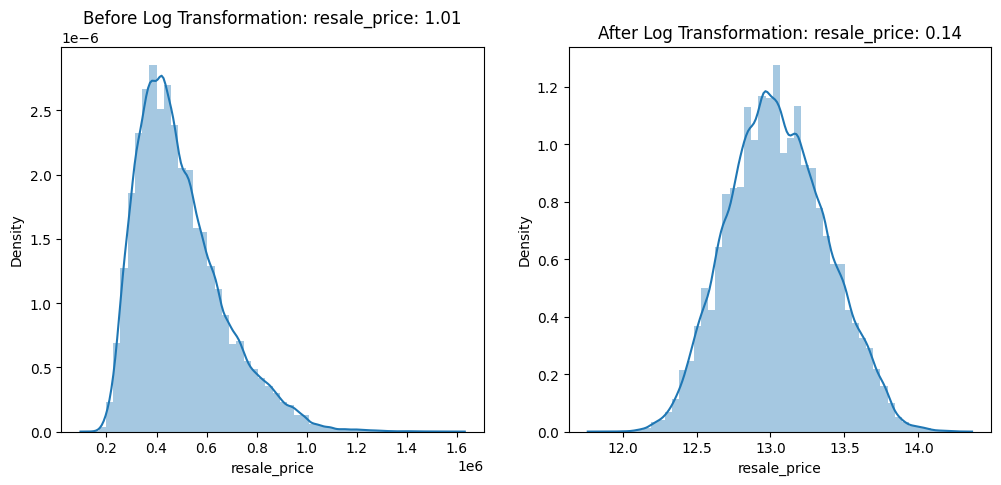

In [23]:
y = ['min_dist_mrt', 'storey_median', 'resale_price']
for i in y:
    fig,axes = plt.subplots(1,2,figsize=(12,5))
    sns.distplot(scope_df[i],ax=axes[0])
    axes[0].set_title(f"Before Log Transformation: {i}:{scope_df[i].skew(): .2f}")
    sns.distplot(df1[i],ax=axes[1])
    axes[1].set_title(f"After Log Transformation: {i}:{df1[i].skew(): .2f}") 
    plt.show()

In [24]:
df2 = df1.copy()

In [25]:
columns = ['cbd_dist', 'min_dist_mrt','floor_area_sqm','lease_remain_years', 'storey_median', 'resale_price']
for i in columns:
    Q1 = df2[i].quantile(0.25)
    Q3 = df2[i].quantile(0.75)
    IQR = Q3-Q1
    print(i,"----",Q1,"---",Q3,"---",IQR)
    outliers = df2[(df2[i]<(Q1-(1.5*IQR))) | (df2[i]>(Q3+(1.5*IQR)))]
    print(outliers.shape)

cbd_dist ---- 9724.338791708831 --- 15476.83524253788 --- 5752.496450829049
(243, 8)
min_dist_mrt ---- 5.791309466382005 --- 6.738984492634829 --- 0.9476750262528242
(2259, 8)
floor_area_sqm ---- 82.0 --- 112.0 --- 30.0
(1261, 8)
lease_remain_years ---- 60.0 --- 80.0 --- 20.0
(0, 8)
storey_median ---- 1.6094379124341003 --- 2.3978952727983707 --- 0.7884573603642704
(817, 8)
resale_price ---- 12.815838217151068 --- 13.279367126213993 --- 0.46352890906292465
(533, 8)


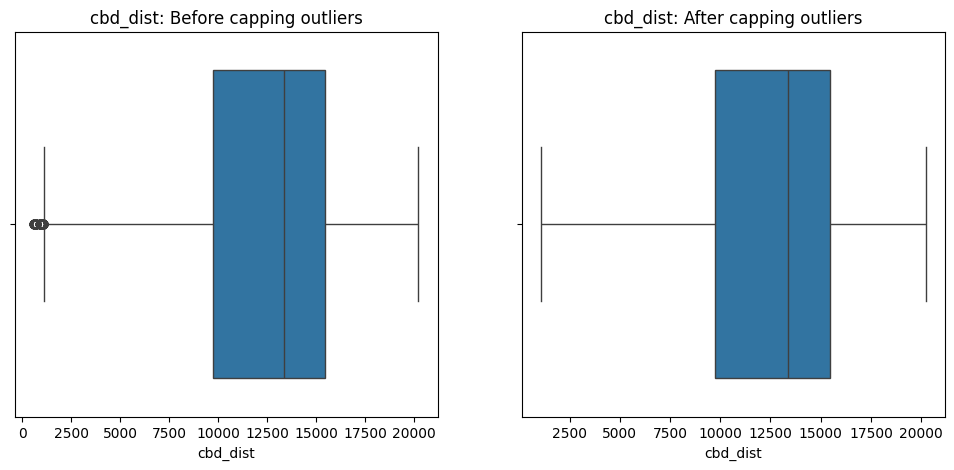

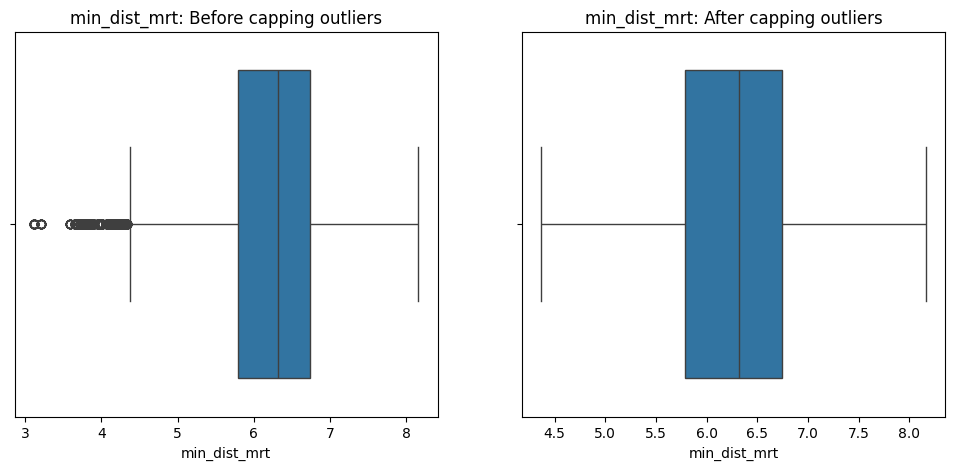

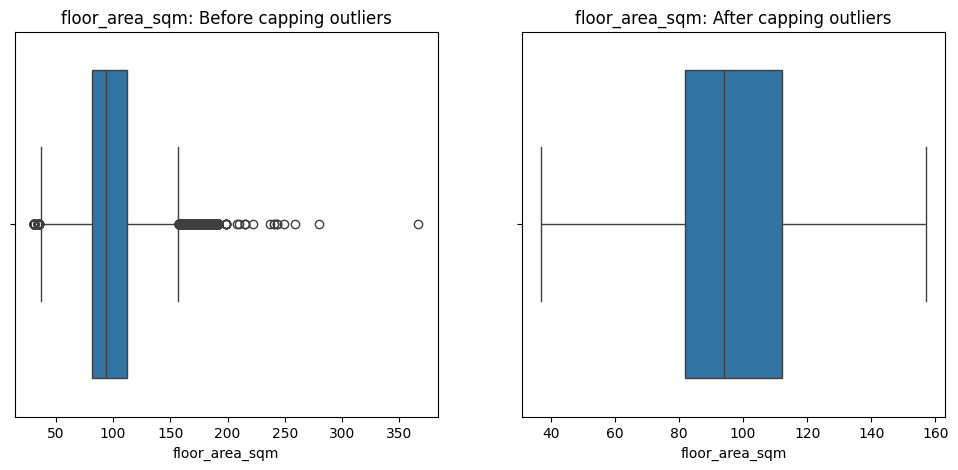

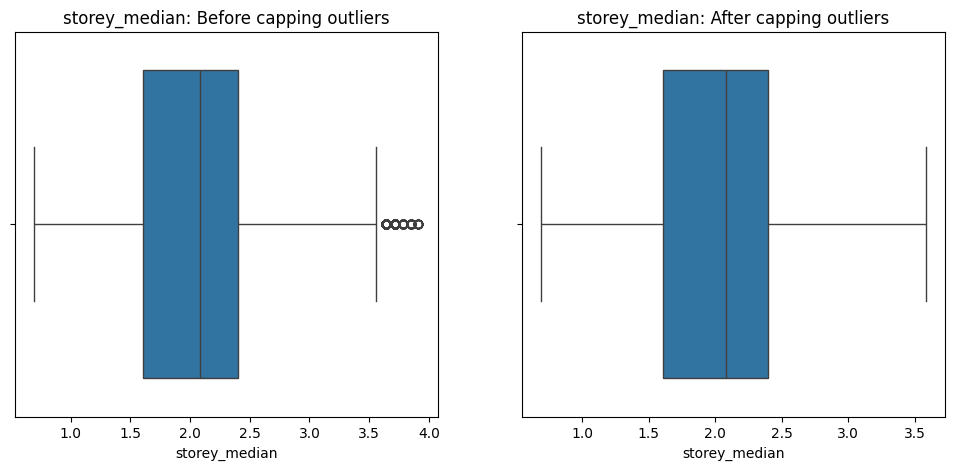

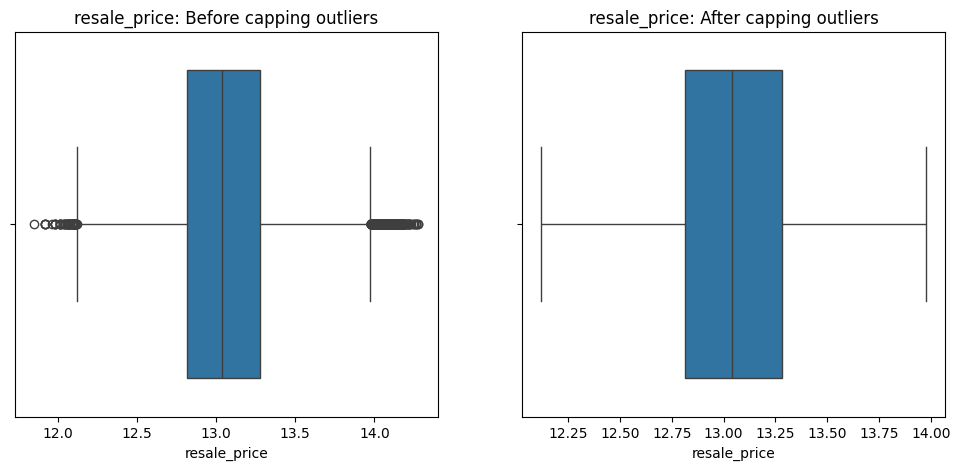

In [26]:
columns = ['cbd_dist', 'min_dist_mrt','floor_area_sqm', 'storey_median', 'resale_price']
for i in columns:
    Q1 = df2[i].quantile(0.25)
    Q3 = df2[i].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    df2[i] = np.where(df2[i]<lower_bound,lower_bound,
                     np.where(df2[i]>upper_bound,upper_bound,df2[i]))
    fig, axes = plt.subplots(1,2,figsize=(12,5))
    sns.boxplot(x=df1[i],ax=axes[0])
    axes[0].set_title(f'{i}: Before capping outliers')
    sns.boxplot(x=df2[i],ax=axes[1])
    axes[1].set_title(f'{i}: After capping outliers')
    plt.show()


In [27]:
df2.columns

Index(['cbd_dist', 'min_dist_mrt', 'flat_type', 'flat_model', 'floor_area_sqm',
       'lease_remain_years', 'storey_median', 'resale_price'],
      dtype='object')

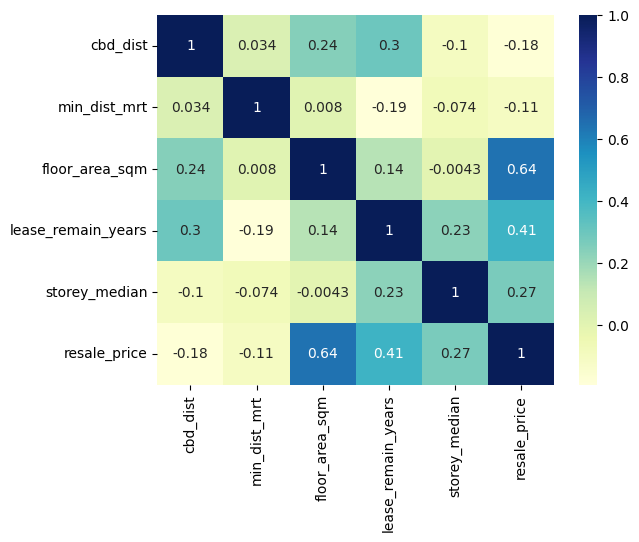

In [28]:
corr_matrix = df2[['cbd_dist', 'min_dist_mrt','floor_area_sqm', 'lease_remain_years', 'storey_median', 'resale_price']].corr()
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")
plt.show()

In [29]:
df2["flat_type"].unique()

array(['3 ROOM', '5 ROOM', '4 ROOM', 'EXECUTIVE', '2 ROOM',
       'MULTI-GENERATION', '1 ROOM'], dtype=object)

In [30]:
df2["flat_model"].unique()

array(['Improved', 'Adjoined flat', 'Model A', 'New Generation',
       'Standard', 'Apartment', 'Maisonette', 'Simplified',
       'Model A-Maisonette', '2-room', 'Premium Apartment',
       'Improved-Maisonette', 'Model A2', 'Multi Generation', 'DBSS',
       'Type S1', 'Type S2', '3Gen', 'Premium Apartment Loft', 'Terrace',
       'Premium Maisonette'], dtype=object)

In [41]:
x = df2[['cbd_dist', 'min_dist_mrt', 'flat_type', 'flat_model', 'floor_area_sqm',
       'lease_remain_years', 'storey_median']]
y = df2[['resale_price']]

In [42]:
from sklearn.preprocessing import OneHotEncoder
ohe_flat_type = OneHotEncoder(handle_unknown = "ignore")
ohe_flat_type.fit(x[['flat_type']])
x_flat_type = ohe_flat_type.fit_transform(x[['flat_type']]).toarray()

ohe_flat_model = OneHotEncoder(handle_unknown="ignore")
ohe_flat_model.fit(x[['flat_model']])
x_flat_model = ohe_flat_model.fit_transform(x[['flat_model']]).toarray()

X = np.concatenate((x[['cbd_dist', 'min_dist_mrt','floor_area_sqm','lease_remain_years', 'storey_median']].values,x_flat_type,x_flat_model),axis=1)

In [43]:
print(X)

[[2715.82220152    6.12488547   74.         ...    0.
     0.            0.        ]
 [2715.82220152    6.12488547   68.         ...    0.
     0.            0.        ]
 [2715.82220152    6.12488547   68.         ...    0.
     0.            0.        ]
 ...
 [2525.25113245    5.20874557   92.         ...    0.
     0.            0.        ]
 [2525.25113245    5.20874557  112.         ...    0.
     0.            0.        ]
 [2525.25113245    5.20874557   92.         ...    0.
     0.            0.        ]]


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [45]:
scaled_input = pd.DataFrame(X)
print(scaled_input)

              0         1         2         3         4         5         6   \
0      -2.214575 -0.172821 -0.979694 -1.190291 -0.442260 -0.017422 -0.129401   
1      -2.214575 -0.172821 -1.232076 -1.190291  0.212657 -0.017422 -0.129401   
2      -2.214575 -0.172821 -1.232076 -1.190291  0.212657 -0.017422 -0.129401   
3      -2.214575 -0.172821 -1.232076 -1.190291  0.212657 -0.017422 -0.129401   
4      -2.214575 -0.172821 -1.232076 -1.190291  0.212657 -0.017422 -0.129401   
...          ...       ...       ...       ...       ...       ...       ...   
217495 -2.257914 -1.518088  0.618724  1.516222  1.684192 -0.017422 -0.129401   
217496 -2.257914 -1.518088  0.618724  1.516222  1.489444 -0.017422 -0.129401   
217497 -2.257914 -1.518088 -0.222549  1.516222  1.855030 -0.017422 -0.129401   
217498 -2.257914 -1.518088  0.618724  1.516222  2.269229 -0.017422 -0.129401   
217499 -2.257914 -1.518088 -0.222549  1.516222  0.656400 -0.017422 -0.129401   

              7         8        9   ..

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
dtr = DecisionTreeRegressor()

param_grid = {
    'max_depth': [2, 5, 10, 15, 20, 22],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [48]:
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 22, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 5}


In [49]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [50]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error: ",mse)
print("Mean Absolute Error: ",mae)
print("Root Mean Squared Error: ",rmse)
print("R-Squared: ",r2)

Mean Squared Error:  0.02064328983281321
Mean Absolute Error:  0.1146551396880439
Root Mean Squared Error:  0.1436777290773111
R-Squared:  0.8119266178464695


In [51]:
grid_search.score(X_train,y_train)

0.8424762140248158

In [52]:
grid_search.score(X_test,y_test)

0.8119266178464695

In [53]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
with open('flattype.pkl', 'wb') as file:
    pickle.dump(ohe_flat_type, file)
with open('flatmodel.pkl', 'wb') as file:
    pickle.dump(ohe_flat_model, file)